In [1]:
import numpy as np

import pymc3 as pm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Simulate data
# One dataset with independent theta/n, one dataset with dependent theta/n

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

n = np.random.randint(1, 10, size=1000)
n_raw = np.concatenate([np.ones(n_i) * n_i for n_i in n])

theta_independent = .5
theta_dependent = sigmoid(n - 5)

y_independent = [np.random.binomial(1, theta_independent, size=n_i) for n_i in n]
y_independent_raw = np.concatenate(y_independent)
y_independent_trials = np.concatenate([y.sum(keepdims=True) for y in y_independent])

y_dependent = [np.random.binomial(1, theta_i, size=n_i) for n_i, theta_i in zip(n, theta_dependent)]
y_dependent_raw = np.concatenate(y_dependent)
y_dependent_trials = np.concatenate([y.sum(keepdims=True) for y in y_dependent])

In [11]:
def _model_trunk(mu):
#     kappa = pm.Gamma(.01, .01)
#     a = mu * kappa
#     b = (1 - mu) * kappa
#     theta = pm.Beta('theta', a, b)
    
#     return theta
    return mu


def bernoulli_model_independent(y_obs):
    with pm.Model() as model:
        a0 = pm.Normal('a0', 0, 1)
        
        mu = pm.invlogit(a0 * 1)
#         theta = _model_trunk(mu)
        
        y_hat = pm.Bernoulli('yhat', p=mu, observed=y_obs)
        
    return model


def bernoulli_model_dependent(y_obs, n_obs):
    with pm.Model() as model:
        a0 = pm.Normal('a0', 0, 5)
        a = pm.Normal('a', 0, 5)
        
        mu = pm.invlogit(a0 + a * n_obs)
        theta = _model_trunk(mu)
        
        y_hat = pm.Bernoulli('yhat', p=theta, observed=y_obs)
        
    return model


def binomial_model_independent(y_obs, n_obs):
    with pm.Model() as model:
        a0 = pm.Normal('a0', 0, 5)
        
        mu = pm.invlogit(a0)
        theta = _model_trunk(mu)
        
        y_hat = pm.Binomial('yhat', p=theta, n=n_obs, observed=y_obs)
        
    return model


def binomial_model_dependent(y_obs, n_obs):
    with pm.Model() as model:
        a0 = pm.Normal('a0', 0, 5)
        a = pm.Normal('a', 0, 5)
        
        mu = pm.invlogit(a0 + a * n_obs)
        theta = _model_trunk(mu)
        
        y_hat = pm.Binomial('yhat', p=theta, n=n_obs, observed=y_obs)
        
    return model

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a0]
Sampling 4 chains: 100%|██████████| 16000/16000 [00:03<00:00, 4741.41draws/s]


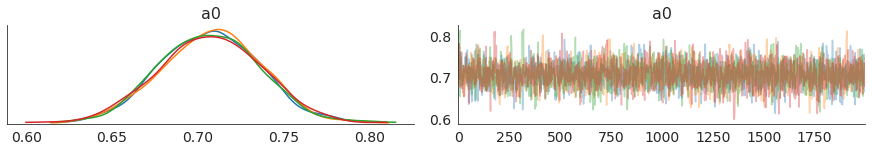

In [22]:
model = bernoulli_model_independent(y_dependent_raw)

with model:
    step = pm.NUTS(target_accept=.98, max_treedepth=10)
    trace = pm.sample(2000, step, tune=2000, chains=4, cores=4)

sns.set_style('white')
pm.traceplot(trace)
sns.despine();

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, a0]
Sampling 4 chains: 100%|██████████| 16000/16000 [00:49<00:00, 326.34draws/s]
The number of effective samples is smaller than 25% for some parameters.


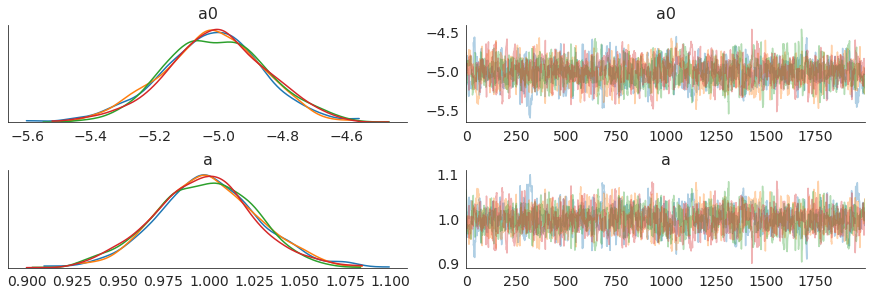

In [24]:
model = bernoulli_model_dependent(y_dependent_raw, n_raw)

with model:
    step = pm.NUTS(target_accept=.98, max_treedepth=10)
    trace = pm.sample(2000, step, tune=2000, chains=4, cores=4)

sns.set_style('white')
pm.traceplot(trace)
sns.despine();

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a0]
Sampling 4 chains: 100%|██████████| 16000/16000 [00:02<00:00, 6001.09draws/s]


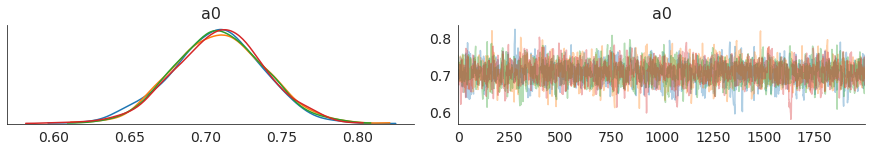

In [25]:
model = binomial_model_independent(y_dependent_trials, n)

with model:
    step = pm.NUTS(target_accept=.98, max_treedepth=10)
    trace = pm.sample(2000, step, tune=2000, chains=4, cores=4)

sns.set_style('white')
pm.traceplot(trace)
sns.despine();

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, a0]
Sampling 4 chains: 100%|██████████| 16000/16000 [00:15<00:00, 1009.27draws/s]
The number of effective samples is smaller than 25% for some parameters.


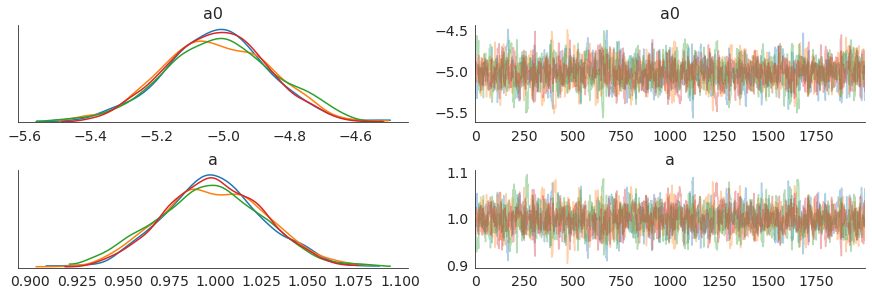

In [26]:
model = binomial_model_dependent(y_dependent_trials, n)

with model:
    step = pm.NUTS(target_accept=.98, max_treedepth=10)
    trace = pm.sample(2000, step, tune=2000, chains=4, cores=4)

sns.set_style('white')
pm.traceplot(trace)
sns.despine();

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a0]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:01<00:00, 6433.61draws/s]


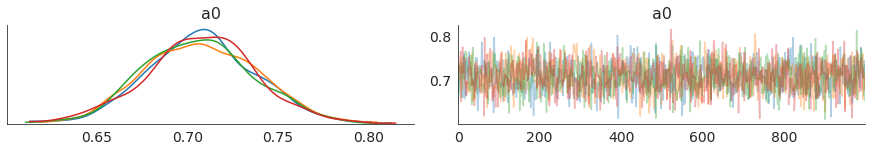

In [13]:
model = bernoulli_model_independent(y_dependent_raw)

with model:
    trace = pm.sample(1000, tune=2000, chains=4, cores=4)

sns.set_style('white')
pm.traceplot(trace)
sns.despine();

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, a0]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:19<00:00, 604.64draws/s]
The acceptance probability does not match the target. It is 0.8942560890708464, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


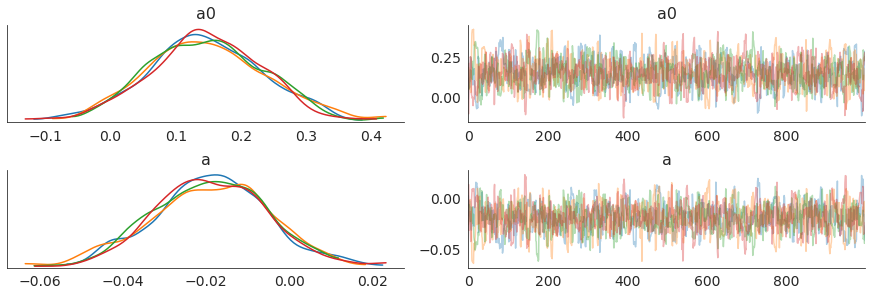

In [14]:
model = bernoulli_model_dependent(y_independent_raw, n_raw)

with model:
    trace = pm.sample(1000, tune=2000, chains=4, cores=4)

sns.set_style('white')
pm.traceplot(trace)
sns.despine();

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, a0]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:20<00:00, 575.51draws/s]
The acceptance probability does not match the target. It is 0.8810930755991537, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


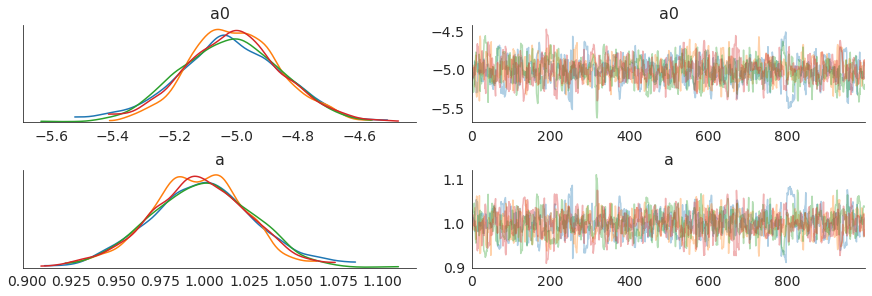

In [15]:
model = bernoulli_model_dependent(y_dependent_raw, n_raw)

with model:
    trace = pm.sample(1000, tune=2000, chains=4, cores=4)

sns.set_style('white')
pm.traceplot(trace)
sns.despine();

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a0]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:01<00:00, 7357.33draws/s]


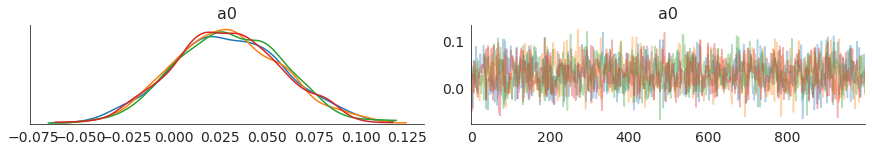

In [16]:
model = binomial_model_independent(y_independent_trials, n)

with model:
    trace = pm.sample(1000, tune=2000, chains=4, cores=4)

sns.set_style('white')
pm.traceplot(trace)
sns.despine();

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a0]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:01<00:00, 7296.13draws/s]


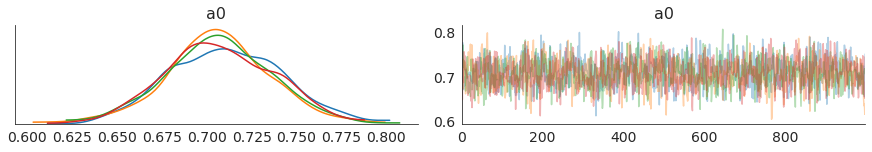

In [17]:
model = binomial_model_independent(y_dependent_trials, n)

with model:
    trace = pm.sample(1000, tune=2000, chains=4, cores=4)

sns.set_style('white')
pm.traceplot(trace)
sns.despine();

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, a0]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:07<00:00, 1548.16draws/s]
The acceptance probability does not match the target. It is 0.9080380318086929, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8872550186594211, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


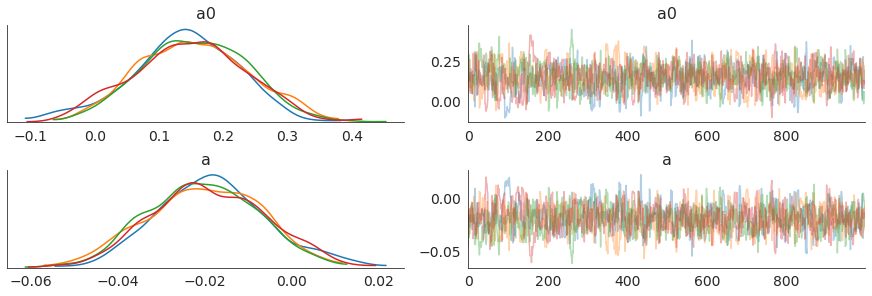

In [18]:
model = binomial_model_dependent(y_independent_trials, n)

with model:
    trace = pm.sample(1000, tune=2000, chains=4, cores=4)

sns.set_style('white')
pm.traceplot(trace)
sns.despine();

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, a0]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:06<00:00, 1716.81draws/s]
The acceptance probability does not match the target. It is 0.6145089181886337, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7137266150321638, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


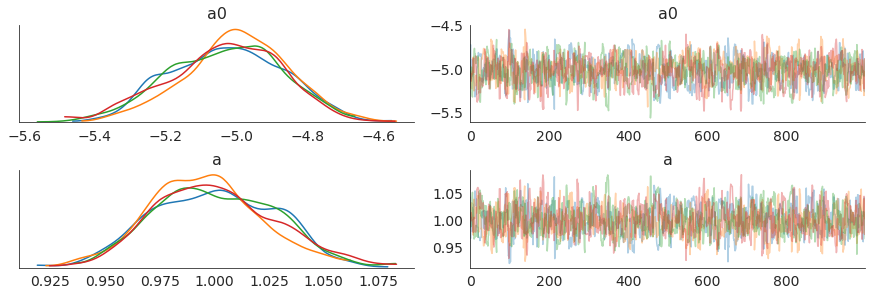

In [19]:
model = binomial_model_dependent(y_dependent_trials, n)

with model:
    trace = pm.sample(1000, tune=2000, chains=4, cores=4)

sns.set_style('white')
pm.traceplot(trace)
sns.despine();